In [1]:
# Plot PKR functional scores by sites conserved or under positive selection
# Figures 2E and 5E

In [5]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# figure save directory
save_dir = "../../results/figures/pkr-positive-selection"
os.makedirs(save_dir, exist_ok=True)

In [7]:
input_file = '../../results/barseq/pkr-variant-reads_240228.csv'
df = pd.read_csv(input_file)

def pkr_type(x, pkr_stop = 551):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x[-2:] == 'WT':
        return "WT"
    else:
        return 'Variant'

df['pkr_type'] = df['pkr'].apply(pkr_type)

/tmp/ipykernel_3369168/1280139667.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


PKR Variants Paired with K3Δ58


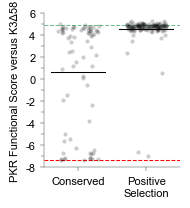

Group 1: 0.7114771405435437 4.7303386338887785
Group 2: 4.535936812185621 1.5296617430870272
T statistic: -8.347399143484711
p-value: 1.2688819783128884e-14
Degrees of Freedom: 195

The difference in mean Functional Score between PKR variants at conserved sites (M=0.71, SD=4.73) and sites under positive selection (M=4.54, SD=1.53 is significant (Independent T-test, t(195)=-8.35, p=0.0).
PKR Variants Paired with K3


/tmp/ipykernel_3369168/1280139667.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


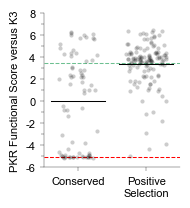

Group 1: 0.009051747720316226 4.2113721717773664
Group 2: 3.3854513190579607 2.0602462985043952
T statistic: -7.54764914128654
p-value: 1.6570874040438965e-12
Degrees of Freedom: 195

The difference in mean Functional Score between PKR variants at conserved sites (M=0.01, SD=4.21) and sites under positive selection (M=3.39, SD=2.06 is significant (Independent T-test, t(195)=-7.55, p=0.0).
PKR Variants Paired with K3-H47R


/tmp/ipykernel_3369168/1280139667.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


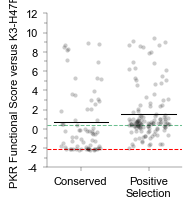

Group 1: 0.7127655918756318 3.360210991923273
Group 2: 1.5533494626873086 2.70217045845501
T statistic: -1.916731532338639
p-value: 0.05673406313540517
Degrees of Freedom: 195

The difference in mean Functional Score between PKR variants at conserved sites (M=0.71, SD=3.36) and sites under positive selection (M=1.55, SD=2.7 is significant (Independent T-test, t(195)=-1.92, p=0.05673).


In [8]:
# Plot sites under positive selection in vertebrates (Rothenburg 2009)

for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3","K3-H47R"]):
    temp_df = df.query('k3 == @k3 and pkr_type == "Variant"')
    
    # plot parameters
    width_in = 1.75
    height_in = 2
    font_size = 8
    font = 'Arial'
    stroke = .25
    tick_len = 3
    alpha_val = .2
    marker_diameter = 3 # 3
    #ymin = -5
    #ymax=5.9
    
    font = {'family': font, 'size': font_size}
    plt.rc('font', **font)
    
    plt.rc('lines', linewidth=stroke)
    
    plt.figure(figsize=(width_in, height_in)) # save size
    
    ax = sns.stripplot(
        data=temp_df,
        x='vert_sele_analysis',
        y='auc_mean',
        color='black',
        alpha=alpha_val,
        size=marker_diameter,
        order = ['Conserved PKR Residue','Vertebrate Positive Selection'],
        jitter=.3,
        zorder=2
    )

    sns.boxplot(
        data=temp_df,
        x="vert_sele_analysis",
        y="auc_mean",
        order = ['Conserved PKR Residue','Vertebrate Positive Selection'],
        showmeans=True,
        meanline=True,
        meanprops={'color': 'black', 'ls': '-', 'lw': .75},
        medianprops={'visible': False},
        whiskerprops={'visible': False},
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax,
        zorder=1
    )
    
    # y tick limits
    if k3 == "K3L-Null":
        plt.ylim(-8, 6)
    elif k3 == "K3L-WT":
        plt.ylim(-6, 8)
    elif k3 == "K3L-H47R":
        plt.ylim(-4, 12)
    
    # modify plot spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(stroke)
    ax.spines['bottom'].set_linewidth(stroke)

    # Set major ticks at even numbers and label as integers
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
    
    # Show minor ticks for every integer
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # Set major tick length
    ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
    plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')
    
    # wt dashed line
    hline = df.query('k3 == @k3 and pkr_type == "WT"')['auc_mean'].values[0]
    ax.axhline(y=hline, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)

    # nonsense dashed line
    hline = df.query('k3 == @k3 and pkr_type == "Nonsense" ')['auc_mean'].mean()
    ax.axhline(y=hline, color='red', linestyle='--', linewidth=.75, zorder=0)
    
    # x tick labels
    new_labels = ['Conserved','Positive\nSelection']
    ax.set_xticklabels(new_labels)
    #plt.xticks(rotation=45, ha='right')
    
    plt.title('')
    plt.xlabel('')
    plt.ylabel(f'PKR Functional Score versus {k3_name}')
    plt.rc('axes', linewidth=stroke)
    
    # save plot
    fig = ax.get_figure()
    plot_name = f'pkr-pss-vertebrate_{k3_name}.svg'
    output_file = os.path.join(save_dir, plot_name)
    fig.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)
    
    print(f'PKR Variants Paired with {k3_name}')
    plt.show()

    # stats: independent t-test (aka two-sample t test)
    group1 = temp_df[temp_df["vert_sele_analysis"] == "Conserved PKR Residue"]['auc_mean']
    group2 = temp_df[temp_df["vert_sele_analysis"] == "Vertebrate Positive Selection"]['auc_mean']
    print('Group 1:', group1.mean(), group1.std())
    print('Group 2:', group2.mean(), group2.std())
    
    t_statistic, p_value = ttest_ind(group1,group2)
    print('T statistic:',t_statistic)
    print('p-value:',p_value)
    
    degree_freedom = len(group1) + len(group2) - 2
    print('Degrees of Freedom:',degree_freedom)
    
    print()
    print(f"The difference in mean Functional Score between PKR variants at conserved sites (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites under positive selection (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")


PKR Variants Paired with K3Δ58


/tmp/ipykernel_3369168/1330844162.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


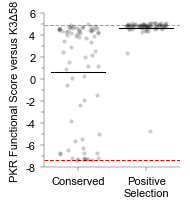

/tmp/ipykernel_3369168/1330844162.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


Group 1: 0.7114771405435437 4.7303386338887785
Group 2: 4.535936812185621 1.5296617430870272
T statistic: -8.347399143484711
p-value: 1.2688819783128884e-14
Degrees of Freedom: 195

The difference in mean Functional Score between PKR variants at conserved sites (M=0.71, SD=4.73) and sites under positive selection (M=4.54, SD=1.53 is significant (Independent T-test, t(195)=-8.35, p=0.0).
PKR Variants Paired with K3


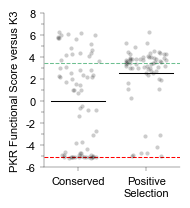

Group 1: 0.009051747720316226 4.2113721717773664
Group 2: 3.3854513190579607 2.0602462985043952
T statistic: -7.54764914128654
p-value: 1.6570874040438965e-12
Degrees of Freedom: 195

The difference in mean Functional Score between PKR variants at conserved sites (M=0.01, SD=4.21) and sites under positive selection (M=3.39, SD=2.06 is significant (Independent T-test, t(195)=-7.55, p=0.0).


/tmp/ipykernel_3369168/1330844162.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


PKR Variants Paired with K3-H47R


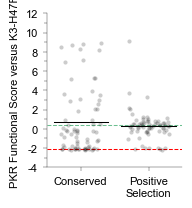

Group 1: 0.7127655918756318 3.360210991923273
Group 2: 1.5533494626873086 2.70217045845501
T statistic: -1.916731532338639
p-value: 0.05673406313540517
Degrees of Freedom: 195

The difference in mean Functional Score between PKR variants at conserved sites (M=0.71, SD=3.36) and sites under positive selection (M=1.55, SD=2.7 is significant (Independent T-test, t(195)=-1.92, p=0.05673).


In [10]:
# Plot sites under positive selection in primates (Elde 2009)

for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3","K3-H47R"]):
    temp_df = df.query('k3 == @k3 and pkr_type == "Variant"')
    
    # plot parameters
    width_in = 1.75
    height_in = 2
    font_size = 8
    font = 'Arial'
    stroke = .25
    tick_len = 3
    alpha_val = .2
    marker_diameter = 3 # 3
    #ymin = -5
    #ymax=5.9
    
    font = {'family': font, 'size': font_size}
    plt.rc('font', **font)
    
    plt.rc('lines', linewidth=stroke)
    
    plt.figure(figsize=(width_in, height_in)) # save size
    
    ax = sns.stripplot(
        data=temp_df,
        x='primate_sele_analysis',
        y='auc_mean',
        color='black',
        alpha=alpha_val,
        size=marker_diameter,
        order = ['Conserved PKR Residue','Primate Positive Selection'],
        jitter=.3,
        zorder=2
    )

    sns.boxplot(
        data=temp_df,
        x="primate_sele_analysis",
        y="auc_mean",
        order = ['Conserved PKR Residue','Primate Positive Selection'],
        showmeans=True,
        meanline=True,
        meanprops={'color': 'black', 'ls': '-', 'lw': .75},
        medianprops={'visible': False},
        whiskerprops={'visible': False},
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax,
        zorder=1
    )
    
    # y tick limits
    if k3 == "K3L-Null":
        plt.ylim(-8, 6)
    elif k3 == "K3L-WT":
        plt.ylim(-6, 8)
    elif k3 == "K3L-H47R":
        plt.ylim(-4, 12)
    
    # modify plot spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(stroke)
    ax.spines['bottom'].set_linewidth(stroke)

    # Set major ticks at even numbers and label as integers
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
    
    # Show minor ticks for every integer
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # Set major tick length
    ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
    plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')
    
    # wt dashed line
    hline = df.query('k3 == @k3 and pkr_type == "WT"')['auc_mean'].values[0]
    ax.axhline(y=hline, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)

    # nonsense dashed line
    hline = df.query('k3 == @k3 and pkr_type == "Nonsense" ')['auc_mean'].mean()
    ax.axhline(y=hline, color='red', linestyle='--', linewidth=.75, zorder=0)
    
    # x tick labels
    new_labels = ['Conserved','Positive\nSelection']
    ax.set_xticklabels(new_labels)
    #plt.xticks(rotation=45, ha='right')
    
    plt.title('')
    plt.xlabel('')
    plt.ylabel(f'PKR Functional Score versus {k3_name}')
    plt.rc('axes', linewidth=stroke)
    
    # save plot
    fig = ax.get_figure()
    plot_name = f'pkr-pss-primate_{k3_name}.svg'
    output_file = os.path.join(save_dir, plot_name)
    fig.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)
    
    print(f'PKR Variants Paired with {k3_name}')
    plt.show()

    # stats: independent t-test (aka two-sample t test)
    group1 = temp_df[temp_df["vert_sele_analysis"] == "Conserved PKR Residue"]['auc_mean']
    group2 = temp_df[temp_df["vert_sele_analysis"] == "Vertebrate Positive Selection"]['auc_mean']
    print('Group 1:', group1.mean(), group1.std())
    print('Group 2:', group2.mean(), group2.std())
    
    t_statistic, p_value = ttest_ind(group1,group2)
    print('T statistic:',t_statistic)
    print('p-value:',p_value)
    
    degree_freedom = len(group1) + len(group2) - 2
    print('Degrees of Freedom:',degree_freedom)
    
    print()
    print(f"The difference in mean Functional Score between PKR variants at conserved sites (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites under positive selection (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")
